In [1]:
print('Im working')

Im working


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
# Imports for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn import preprocessing
from scipy.spatial import distance
from scipy.cluster.hierarchy import fcluster

In [3]:
# Read the dataset
df = pd.read_csv("data/data6.csv")

In [4]:
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(prop, dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
#     np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  prop
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    # perform scaling on the dataset
    dataset = preprocessing.scale(df)
    # Turn into a pandas array again
    dataset = pd.DataFrame({'Column1':dataset[:,0],'Column2':dataset[:,1],'Column3':dataset[:,2],'Column4':dataset[:,3],'Column5':dataset[:,4],'Column6':dataset[:,5]})
    
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run the sampling
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

The sample size we are going to use will be: 3000.0
The new shape of the sampled dataset is: (3000, 6)


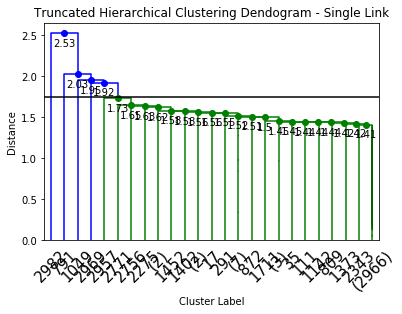

In [5]:
np.random.seed(seed=42)

# Get a sample from the data-set to run hierarchical clustering
sampled_dataset = get_sample_from_dataset(0.01, df)

# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'single')

# set cut-off to 50
max_d = 1.75  # max_d as in max_distance

fancy_dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True,
            max_d=max_d)  # plot a horizontal cut-off line
plt.title('Truncated Hierarchical Clustering Dendogram - Single Link')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')
plt.show()  

# Do the clustering technique
clusters = fcluster(linked, max_d, criterion='distance')

The sample size we are going to use will be: 3000.0
The new shape of the sampled dataset is: (3000, 6)


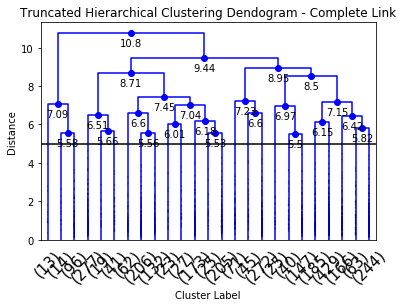

In [6]:
np.random.seed(seed=42)

# Get a sample from the data-set to run hierarchical clustering
sampled_dataset = get_sample_from_dataset(0.01, df)

# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'complete')

# set cut-off to 50
max_d = 5  # max_d as in max_distance

fancy_dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True,
            max_d=max_d)  # plot a horizontal cut-off line
plt.title('Truncated Hierarchical Clustering Dendogram - Complete Link')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')
plt.show()

# Do the clustering technique
clusters = fcluster(linked, max_d, criterion='distance')

The sample size we are going to use will be: 3000.0
The new shape of the sampled dataset is: (3000, 6)


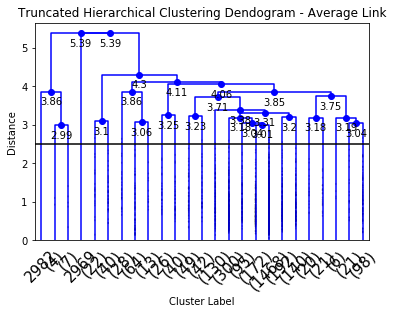

In [7]:
np.random.seed(seed=42)

# Get a sample from the data-set to run hierarchical clustering
sampled_dataset = get_sample_from_dataset(0.01, df)

# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'average')

# set cut-off to 50
max_d = 2.5  # max_d as in max_distance

fancy_dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True,
            max_d=max_d)  # plot a horizontal cut-off line
plt.title('Truncated Hierarchical Clustering Dendogram - Average Link')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')
plt.show()  

# Do the clustering technique
clusters = fcluster(linked, max_d, criterion='distance')

The sample size we are going to use will be: 3000.0
The new shape of the sampled dataset is: (3000, 6)


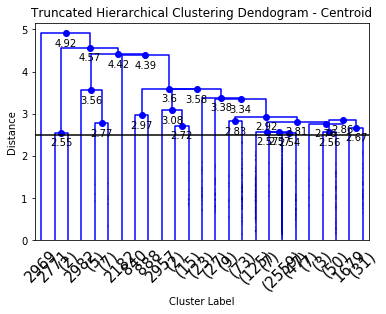

In [10]:
np.random.seed(seed=42)

# Get a sample from the data-set to run hierarchical clustering
sampled_dataset = get_sample_from_dataset(0.01, df)

# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'centroid')

# set cut-off to 50
max_d = 2.5  # max_d as in max_distance

fancy_dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True,
            max_d=max_d)  # plot a horizontal cut-off line
plt.title('Truncated Hierarchical Clustering Dendogram - Centroid')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')
plt.show()

# Do the clustering technique
clusters = fcluster(linked, max_d, criterion='distance')

The sample size we are going to use will be: 3000.0
The new shape of the sampled dataset is: (3000, 6)


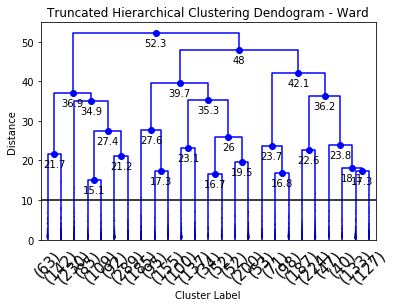

In [8]:
np.random.seed(seed=42)

# Get a sample from the data-set to run hierarchical clustering
sampled_dataset = get_sample_from_dataset(0.01, df)

# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'ward')

# set cut-off to 50
max_d = 10  # max_d as in max_distance

fancy_dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True,
            max_d=max_d)  # plot a horizontal cut-off line
plt.title('Truncated Hierarchical Clustering Dendogram - Ward')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')
plt.show() 

# Do the clustering technique
clusters = fcluster(linked, max_d, criterion='distance')

In [9]:
np.random.seed(seed=42)

# Helper function we are going to use to generate the Hopkins Stat"
def generateRandom(min, max, n):
    # Call NP function for unif random values
    randomArray = np.random.uniform(min,max,n)
    return randomArray
    
# Function to determine the eucliean N-distance between 2 points"
def getDistance(i,j):
    dst = distance.euclidean(i, j)
    return dst
    
# Function to generate a random Vector for the hopkins stat"
def generateRandomVector(dimensions, arrayFormData):
    # Calculate size of the data
    size = len(arrayFormData)
    minValues = []
    maxValues = []
    randomVector = np.zeros(shape=(size,dimensions))
    for i in range(dimensions):
        #Calculate the min and max values
        currentMinValue = min(arrayFormData[:,i])
        currentMaxValue = max(arrayFormData[:,i])
    
        # Generate random numbers between min-max"
        currentComponent = generateRandom(currentMinValue, currentMaxValue, size)
        #Apend to result
        randomVector[:,i] = currentComponent
    
    return randomVector

# Hopkins Stat
def hopkinsStat(uniformVector, arrayFormDf):
    # Hopkins Stat code
    # Initialize denom at 0 
    numerator = 0

    for j in range(len(arrayFormDf)):
        # Set current Min to something huge
        currentMin = 10000

        for i in range(len(arrayFormDf)):    
            # Calculate distance out of a point
            dst = getDistance(uniformVector[j], arrayFormDf[i])
            if dst < currentMin:
                currentMin = dst

        numerator = numerator + currentMin

    # Initialize the num at 0
    denominator = 0


    for j in range(len(arrayFormDf)):
        # Set the current Min to something huge
        currentMin = 1000
        for i in range(len(arrayFormDf)):
            # If i equial j skip
            if i == j:
                continue

            # Calculate distance out of a point
            dst = getDistance(arrayFormDf[j], arrayFormDf[i])
            if dst < currentMin:
                currentMin = dst

        denominator = denominator + currentMin
    
    # Calculate it!
    hopkinsStat = numerator / (numerator + denominator)
    return hopkinsStat

In [11]:
# Calculate the hopkins stat
# Generate a random vector
# Set seed
np.random.seed(seed=42)
sampled_dataset = get_sample_from_dataset(0.0005, df)

# Calculation of the random vector
hopkinsVector = generateRandomVector(6, sampled_dataset.values)

results = []
for i in range(250):
    np.random.seed(seed=(42 + i))

    # Get a sample from the data-set to run the hopkins stat
    sampled_dataset = get_sample_from_dataset(0.0005, df)
    arrayFormSample = sampled_dataset.values
    
    # Print to see progress
    print("Iteration: " + str(i+1))

    ## CALCULATION OF THE HOPKINS STAT ##
    result = hopkinsStat(hopkinsVector, arrayFormSample)
    
    # Apend to the results array
    results.append(result)

print(results)

# Call Hopkins Function
#result = hopkinsStat(hopkinsVector, arrayFormSample)
#print(result)

The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 1
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 2
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 3
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 4
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 5
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 6
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 7
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)


The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 72
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 73
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 74
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 75
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 76
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 77
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 78
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 79
The sample size we are going to use will be: 150.0
The new shape of the sampled 

The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 143
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 144
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 145
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 146
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 147
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 148
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 149
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 150
The sample size we are going to use will be: 150.0
The new shape of the 

The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 214
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 215
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 216
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 217
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 218
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 219
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 220
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 221
The sample size we are going to use will be: 150.0
The new shape of the 

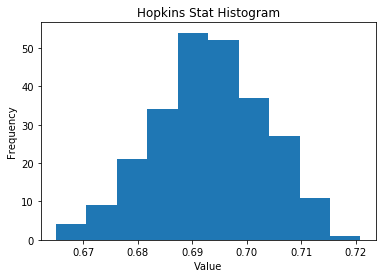

In [12]:
# Plot a histogram with the results of the hopkins stat vector
plt.hist(results)
plt.title("Hopkins Stat Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()